In [1]:
# add matplotlib inline magic command

%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Files to load

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#read the city data file and store it in a pandas dataframe

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#read the ride data file and store it in a pandas data frame

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Amandaburgh,3/5/2019 2:15,26.28,9.070000e+11
1,Amandaburgh,2/24/2019 23:10,43.66,6.570000e+12
2,Amandaburgh,2/10/2019 20:42,36.17,6.460000e+12
3,Amandaburgh,1/11/2019 2:22,29.24,7.280000e+12
4,Amandaburgh,1/21/2019 4:12,9.26,5.530000e+12
5,Amandaburgh,4/19/2019 16:30,6.27,4.400000e+12
6,Amandaburgh,3/20/2019 7:40,27.45,3.700000e+12
7,Amandaburgh,4/1/2019 9:24,24.29,2.000000e+12
8,Amandaburgh,4/20/2019 2:16,16.27,3.510000e+12
9,Amandaburgh,3/13/2019 12:52,13.88,6.220000e+12


In [5]:
#get the coloumns and rows that are not null

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#make sure there are no null values

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get the unique values of the type of city

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#get the number of data points from the urban cities

sum(city_data_df["type"]=="Urban")

66

In [10]:
#the number of data points from the rural cities

sum(city_data_df["type"]=="Rural")

18

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
#get the columns and rows that are not null for ride data

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#get the data types from each colum

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [15]:
#combine the two datasets into one single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city", "city"])


pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,3/5/2019 2:15,26.28,9.070000e+11,12,Urban
1,Amandaburgh,2/24/2019 23:10,43.66,6.570000e+12,12,Urban
2,Amandaburgh,2/10/2019 20:42,36.17,6.460000e+12,12,Urban
3,Amandaburgh,1/11/2019 2:22,29.24,7.280000e+12,12,Urban
4,Amandaburgh,1/21/2019 4:12,9.26,5.530000e+12,12,Urban


In [16]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,3/5/2019 2:15,26.28,9.070000e+11,12,Urban
1,Amandaburgh,2/24/2019 23:10,43.66,6.570000e+12,12,Urban
2,Amandaburgh,2/10/2019 20:42,36.17,6.460000e+12,12,Urban
3,Amandaburgh,1/11/2019 2:22,29.24,7.280000e+12,12,Urban
4,Amandaburgh,1/21/2019 4:12,9.26,5.530000e+12,12,Urban


In [17]:
# Create the Suburban and Rural city DataFrames.

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [18]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
74,Bradshawfurt,3/6/2019 21:44,19.74,6.080000e+12,7,Rural
75,Bradshawfurt,3/24/2019 18:53,57.51,2.300000e+12,7,Rural
76,Bradshawfurt,3/24/2019 7:34,19.89,7.870000e+12,7,Rural
77,Bradshawfurt,2/18/2019 22:21,34.32,8.880000e+12,7,Rural
78,Bradshawfurt,4/8/2019 13:46,55.19,1.740000e+12,7,Rural


In [19]:
#get the number of rides for urban cities

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
#create the suburban and rural ride count

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
#get the average fare for each city in the urban cities

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the suburban and rural cities.

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
# Get the average number of drivers for each urban city.


urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
# Get the average number of drivers for each city for the suburban and rural cities.

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

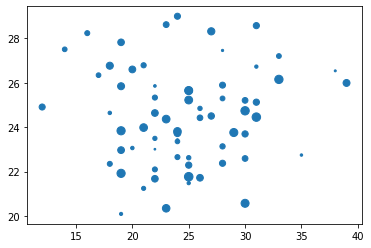

In [25]:
#build the scatter plot for urban cities

plt.scatter(urban_ride_count, urban_avg_fare,s=urban_driver_count)

<function matplotlib.pyplot.legend(*args, **kwargs)>

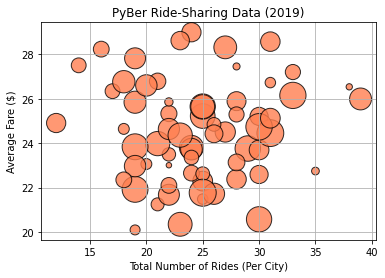

In [26]:
#build the scatter plots for urban cities

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1,alpha=0.8,label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend

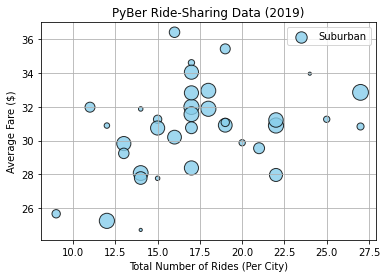

In [27]:
#create the suburban scatter plots

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black",linewidths=1, alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend()



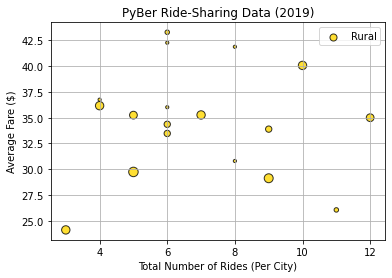

In [28]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

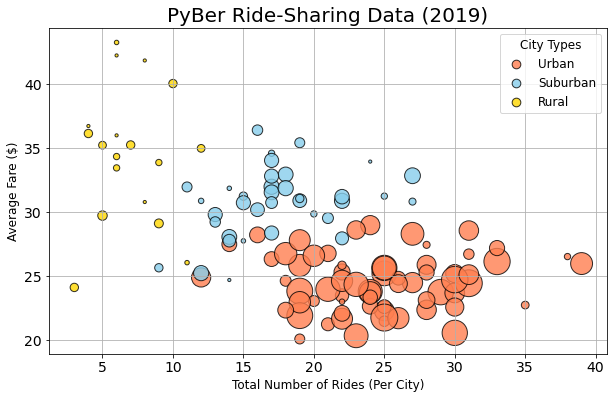

In [68]:
# Add the scatter charts for each type of city.

plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [30]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907464e+12,20.075545
min,4.050000,1.460000e+10,3.000000
25%,14.550000,2.400000e+12,22.000000
50%,24.640000,4.710000e+12,37.000000
75%,34.580000,7.450000e+12,52.000000
max,44.970000,9.990000e+12,73.000000


In [31]:
suburban_cities_df.describe ()



,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.970885e+12,13.712000
std,10.677508,2.912444e+12,8.042372
min,12.050000,3.220000e+08,1.000000
25%,21.970000,2.360000e+12,5.000000
50%,30.750000,5.050000e+12,16.000000
75%,39.830000,7.550000e+12,21.000000
max,49.960000,9.920000e+12,25.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.648063e+12,4.296000
std,14.558046,2.887934e+12,2.691156
min,10.110000,2.680000e+10,1.000000
25%,19.900000,2.280000e+12,1.000000
50%,37.050000,4.020000e+12,4.000000
75%,47.070000,7.120000e+12,7.000000
max,58.550000,9.990000e+12,9.000000


In [33]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [35]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
# Calculate the mean of the ride count for each city type.

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
# Calculate the median of the ride count for each city type.

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [39]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [40]:
#import numpy and the stats module from scipy

import numpy as np

import scipy.stats as sts


In [41]:
#calculate the measures of central tendency for the ride count for the urban cities

mean_urban_ride_count = np.mean(urban_ride_count)

print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")


median_urban_ride_count = np.median(urban_ride_count)

print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)

print(f"The mode for the ride counts for the urban trips is {mode_urban_ride_count}.")



The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for the urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [42]:

mean_suburban_ride_count = np.mean(suburban_ride_count)

print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")


median_suburban_ride_count = np.median(suburban_ride_count)

print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)

print(f"The mode for the ride counts for the suburban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for the suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [43]:
mean_rural_ride_count = np.mean(rural_ride_count)

print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")


median_rural_ride_count = np.median(rural_ride_count)

print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)

print(f"The mode for the ride counts for the rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for the rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [44]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    26.28
1    43.66
2    36.17
3    29.24
4     9.26
Name: fare, dtype: float64

In [45]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [46]:
# Get the driver count data from the urban cities.

urban_drivers = urban_cities_df['driver_count']

urban_drivers.head()

0    12
1    12
2    12
3    12
4    12
Name: driver_count, dtype: int64

In [47]:
rural_drivers = rural_cities_df['driver_count']

rural_drivers.head()

74    7
75    7
76    7
77    7
78    7
Name: driver_count, dtype: int64

In [48]:
suburban_drivers = suburban_cities_df['driver_count']

suburban_drivers.head()

40    11
41    11
42    11
43    11
44    11
Name: driver_count, dtype: int64

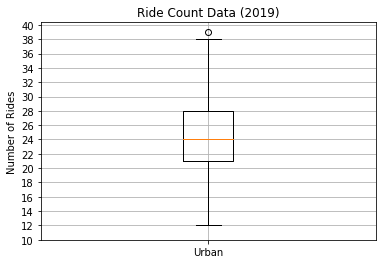

In [49]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [50]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

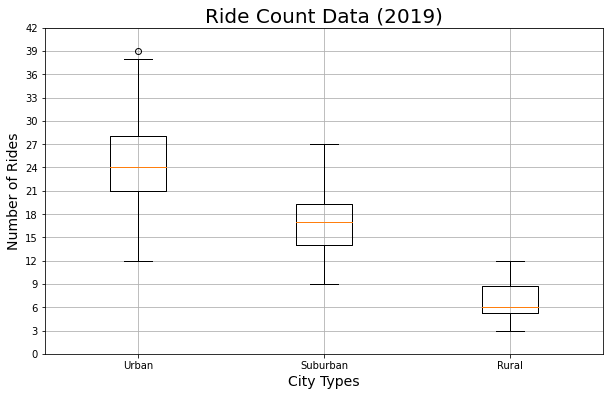

In [51]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [52]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


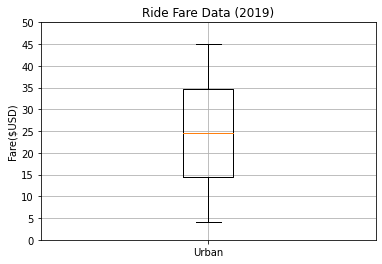

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [53]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

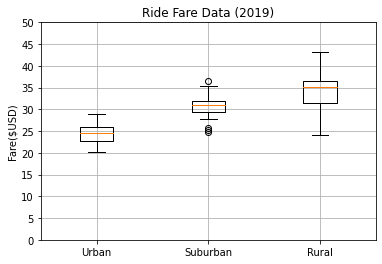

<Figure size 432x288 with 0 Axes>

In [54]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]

ride_fare_data = [urban_avg_fare,suburban_avg_fare,rural_avg_fare]
fig, ax = plt.subplots()

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

plt.savefig("analysis/Fig3.png")

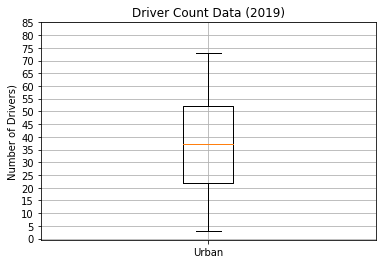

Summary Statistics


In [55]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")


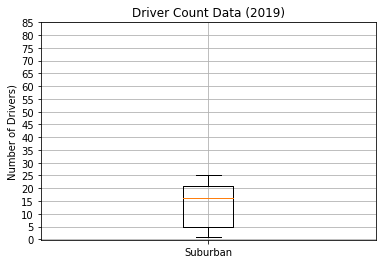

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [56]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

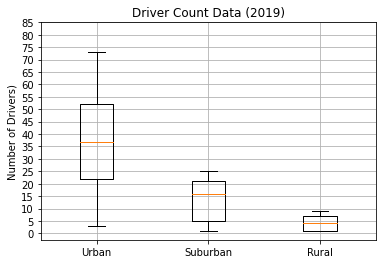

<Figure size 432x288 with 0 Axes>

In [57]:
x_labels = ["Urban", "Suburban","Rural"]

driver_count_data= [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig4.png")

In [58]:
#get the sum of the fares for each city type

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [59]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [60]:
#caculate the percentage of fare for each city type

type_percents = 100 * sum_fares_by_type / total_fares

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [61]:
# Calculate the percentage of fare for each city type.

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

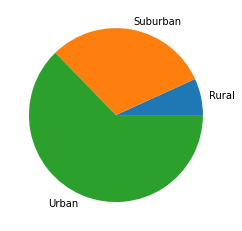

In [62]:
#build the percent of fares by city type pie chart

plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])


plt.show()

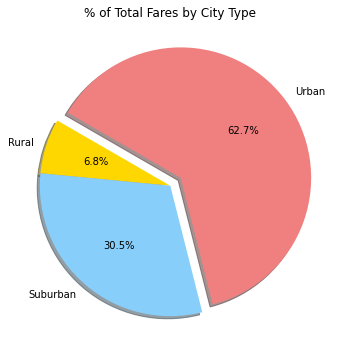

In [63]:

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [64]:
#calculating ride percentages


ride_percents = 100 *pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()

ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

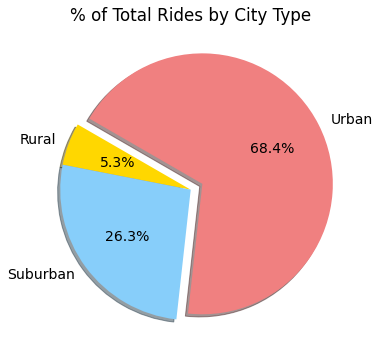

In [65]:
# Build percentage of rides by city type pie chart.

plt.subplots(figsize=(10, 6))

plt.pie(ride_percents,
        
    labels=["Rural", "Suburban", "Urban"],
        
    colors=["gold", "lightskyblue", "lightcoral"],
        
    explode=[0, 0, 0.1],
        
    autopct='%1.1f%%',
        
    shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.

mpl.rcParams['font.size'] = 14

# Save Figure

plt.savefig("analysis/Fig6.png")

# Show Figure

plt.show()

In [66]:
#calculate the percentage of drivers for each city type

driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()

driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

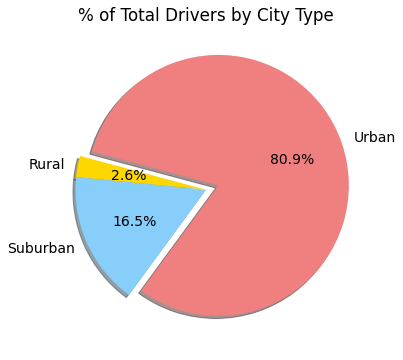

In [67]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()